# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

this is f


/Users/noahbranch/Documents/CodeAndDev.nosync/MachineLearning/MatPlotLib/MatPlotLib_virt/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/noahbranch/Documents/CodeAndDev.nosync/MachineLearning/MatPlotLib/MatPlotLib_virt/lib/python3.7/site-packages/ipykernel_launcher.py:73: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,index,ID,Date,Element,Data_Value
4738,9440,CA001092120,2015-02-07,TMAX,7.5
4770,3532,CA001092120,2015-03-11,TMAX,13.5
4772,4826,CA001092120,2015-03-13,TMAX,16.5
4776,4203,CA001092120,2015-03-17,TMAX,12.0
4777,468,CA001092120,2015-03-18,TMAX,12.5
4799,6858,CA001092120,2015-04-09,TMAX,18.0
4816,4278,CA001092120,2015-04-27,TMAX,19.0
4828,9688,CA001092120,2015-05-09,TMAX,26.0
4829,9025,CA001092120,2015-05-10,TMAX,26.5
4831,3921,CA001092120,2015-05-12,TMAX,26.5


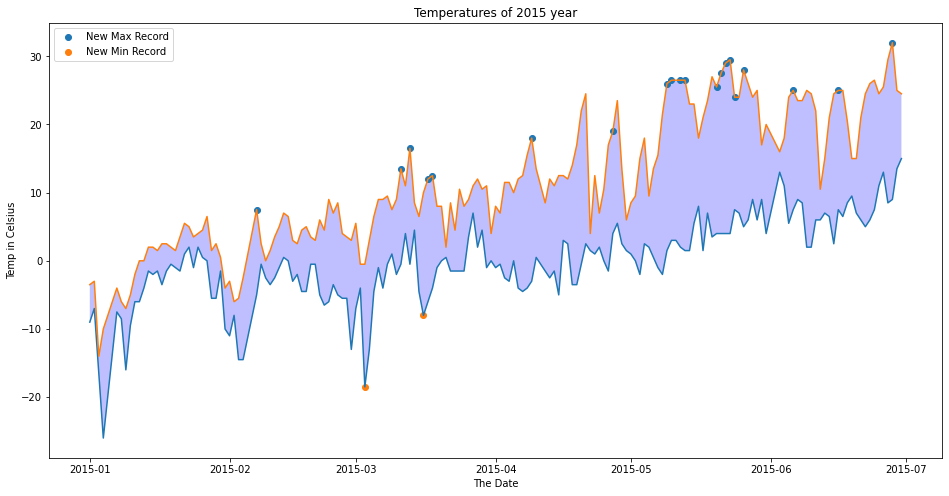

In [199]:
import matplotlib.pyplot as plt
#import mplleaflet
import pandas as pd
from IPython.display import display
import numpy as np

def leaflet_plot_stations(binsize, hashid):
    plt.figure(figsize=[16,8])
    #setting size of figure made it bigger originally to get fit ALL points on grpah

    df = pd.read_csv('Data/f666dea818b4be9dd1717769e2c6e1214c93fa88c6e02be3422a66df.csv'.format(binsize))
    
  
    #here we convert the date column to datetime
    df['Date'] = pd.to_datetime(df['Date']) 
    #dates = df['Date']
    #display(dates)
    #df['Data_Value']=pd.to_numeric(df['value'])
    
    #since the temps are in tenths of a degree we multiply by .10
    df['Data_Value'] = df['Data_Value']*.10
    
    #below we just seperat the MAX values and MIN values into their own tables
    TMIN = df[df['Element']=='TMIN']
    TMAX = df[df['Element']=='TMAX']
    
    #then we reorder each of those df by date....makes things easier to look at and sets the graph up correctly later
    TMIN = TMIN.sort_values(by=['Date'])
    TMAX = TMAX.sort_values(by=['Date'])
   
    
    #Below I reset the index cause when we group by day and month and get idxmax we need the indicies to correct
    #before I did this the indicies were out of order cause of the gorupby
    TMAX = TMAX.reset_index()
    TMIN = TMIN.reset_index()
    
    
    
    #I remeber the TMIN had an extra value that was not in TMAX so below
    #I am getting rid of the values that are not in TMAX
    f = TMIN[~TMIN['Date'].isin(TMAX['Date'])].index #I now it is one row cause I looked at it earlier
    TMIN = TMIN.drop(f)
    f = TMIN[~TMIN['Date'].isin(TMAX['Date'])] #this like was to check if the drop actually worked
    
    #Next I create two more tables for the year of 2015 according to their mins and maxes
    MAX2015 = TMAX[(TMAX['Date'].dt.year==2015)]
    MIN2015 = TMIN[TMIN['Date'].dt.year == 2015]
    
    #AFter so much trial error and research I reached this
    #I had to use the below function to group the indicies of the min of each group. 
    #It says "group by month and day, then just look at the data_value of each goup, and finally return the index 
    #corresponding to each gorup and finally return the index corresponding to the min Data_value in each group"
    groupedMAX = TMAX.groupby(by=[TMAX['Date'].dt.month,TMAX['Date'].dt.day])['Data_Value'].idxmax
    groupedMIN = TMIN.groupby(by=[TMIN['Date'].dt.month,TMIN['Date'].dt.day])['Data_Value'].idxmin
    
        
    print('this is f')
 
    
    
   
    #We ahve to use retrieve indicies in the original TMAX / TMIN Dataframe using the .loc 
    #to get the rows of the original dataframe corresponding to the minimum values of 'Data_Value' in each group
    TMAX_dates = TMAX.iloc[groupedMAX]
    TMIN_dates = TMIN.iloc[groupedMIN]
    
    #next we get the 2015 dates correspoinding to the max and min of each month and day
    TMAX2015 = TMAX_dates[TMAX['Date'].dt.year == 2015]
    TMIN2015 = TMIN_dates[TMIN['Date'].dt.year == 2015]
    display(TMAX2015)
   
    
   
   #finally we plot where the x axis is the date and the y axis is the temperature
    #we bplot both the min and max temperatures
    plt.plot(MIN2015['Date'],MIN2015['Data_Value'],MAX2015['Date'],MAX2015['Data_Value'])

    #then we get the current axis (gca()) and fill the area between the Max and Min values with
    # a shade of blue in the x axis range MAX2015['Date'] (the first argument) and between the 
    #MAX2015 and MAX2015 data_values
    plt.gca().fill_between(MAX2015['Date'], 
                      MAX2015['Data_Value'],MIN2015['Data_Value'],
                       facecolor='blue', 
                       alpha=0.25)
    #Since we are still workig o the same graph we get the current axis and overlay tow scatter plots
    #one for the min and one for the max
    newMax = plt.gca().scatter(TMAX2015['Date'],TMAX2015['Data_Value'])
    newMin = plt.gca().scatter(TMIN2015['Date'],TMIN2015['Data_Value'])
    
    # add a label to the x axis
    plt.xlabel('The Date')
    # add a label to the y axis
    plt.ylabel('Temp in Celsius')
    # add a title
    plt.title('Temperatures of 2015 year')
    
    #these are the labels we add to the legend.
    #we get what the plot returns above and label them respectively 
    plt.legend([newMax,newMin],['New Max Record','New Min Record'])
    
    
    #The End below is the code for the map
    
    
#first we get current axis object (plt.gca()), then indicate range of X values, then lower and uper bounds, then color, adm transparecncy values
    #station_locations_by_hash = df[df['hash'] == hashid]

    #lons = station_locations_by_hash['LONGITUDE'].tolist()
    #lats = station_locations_by_hash['LATITUDE'].tolist()

    #plt.figure(figsize=(8,8))

    #plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    #return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')


##########################################Noah Blog Notes##################
#plt.figure() created figure object
# the whole figure is regarded as the figure object, It is necessary to explicitly use plt.figure()
#when we want to tweak the size of the figure and when we want to add multiple axes objects in a single figuremat
#TMAX and TMIN have differetn dates so I have to pull the dates taht dont match up
#1 was confusing....After looking at other people graphs I realized they were only covering the 2015 year. the instuctions 
# specifically say "write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014"
# to me that means evey year but 2015. Hoever the 2nd problem asks us to over lay a scatter plot of the 2015 year which didn't make sense to me
#because the dates would be off. After looking at other graphs I realize its just a graph of the 2015 year
